#                           Предсказание кассовых сборов фильмов

## Часть 2: Подбор и обучение моделей

In [461]:
%config IPCompleter.greedy=True

In [462]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Считываем данные предобработанные в предыдущей части и выделим таргет(который преобразуем в классы) и остальные фичи

In [463]:
df = pd.read_csv("data/preprocessed_train.csv")

In [464]:
x_features = df.drop(['revenue'], axis=1)

In [465]:
x_features = x_features.drop(['description'], axis=1) #for now only

In [466]:
scaler = MinMaxScaler()
scaler.fit(x_features)
x_features = scaler.transform(x_features)

Будем решать задачу классификация относительно того, в какой диапозон прибыли попадёт тот или иной фильм

In [467]:
def classify_revenue(revenue):
    money_amount = len(str(revenue*5)) - 1
    if money_amount <= 5:
        return 0
    return money_amount - 5

In [468]:
y_df = df['revenue']

In [469]:
y_df = y_df.apply(classify_revenue)

Посмотрим на распределение классов

<Axes: >

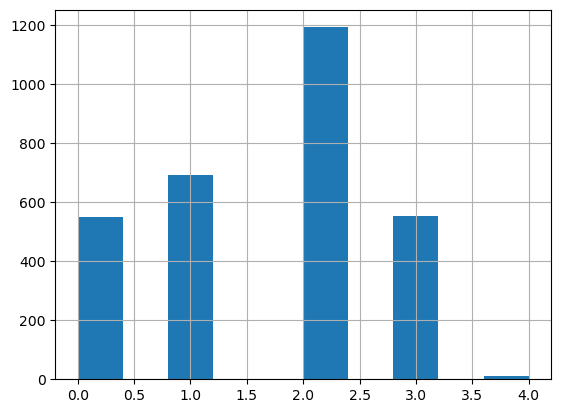

In [470]:
y_df.hist(bins=20)

In [471]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_df, train_size=0.8)

Обучим несколько различных моделей классификации с разными параметрами и будем считать F1 Score, чтобы определить их качество

In [472]:
model_list = [LogisticRegression(max_iter=2000), KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=5), SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), MultinomialNB(), DecisionTreeClassifier()]

In [473]:
def learn_model_and_show_f1_score(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{type(model).__name__} F1 Score is: {f1_score(y_test,y_pred,average='weighted'):.4f}")

In [474]:
for model in model_list:
    learn_model_and_show_f1_score(model)

LogisticRegression F1 Score is: 0.4875
KNeighborsClassifier F1 Score is: 0.3939
KNeighborsClassifier F1 Score is: 0.4449
SVC F1 Score is: 0.4784
SVC F1 Score is: 0.4304
SVC F1 Score is: 0.4182
MultinomialNB F1 Score is: 0.3970
DecisionTreeClassifier F1 Score is: 0.5142


Также обучим Random_Forest_Classifier, подбирая параметры с помозью Grid_Seacrh.

In [475]:
random_forest_classifier_params = {
    'n_estimators': [5, 100, 500,1000,10000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 100, 150, 200, 250]
}

In [476]:
%%time
search = GridSearchCV(RandomForestClassifier(), random_forest_classifier_params)
search.fit(x_train, y_train)
search.best_estimator_

CPU times: total: 1h 10min 1s
Wall time: 1h 10min 35s


RandomForestClassifier(max_depth=150, n_estimators=10000)